In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demand profiles

### Read Plug Load Profile

In [47]:
df_ele = pd.read_csv("Electricity_Profile.csv",sep=";", header=None)
df_ele["Aggregate"] = df_ele.sum(axis=1)
df_ele

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Aggregate
0,240,279,243,237,275,302,296,192,280,255,286,273,249,237,274,282,285,4485
1,240,279,243,237,275,302,296,192,280,255,286,273,249,237,274,282,285,4485
2,240,279,243,237,275,302,296,192,280,255,286,273,249,237,274,282,285,4485
3,240,279,243,237,275,302,296,192,280,255,286,273,249,237,274,282,285,4485
4,240,279,243,237,275,302,296,192,280,255,286,273,249,237,274,282,285,4485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,162,207,182,108,144,247,138,135,143,146,207,144,249,185,216,282,133,3028
525596,162,148,182,108,201,247,138,135,143,146,207,144,249,185,216,209,133,2953
525597,162,148,182,108,201,247,138,135,201,146,207,144,249,185,216,209,133,3011
525598,162,148,182,108,201,247,138,135,201,146,207,144,249,185,216,209,133,3011


In [48]:
df = df_ele["Aggregate"].copy()
df = df.to_frame()
df["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20190101') + pd.to_timedelta(np.arange(525600),unit='m')).values)
df = df.set_index("Time Stamp")
df = df.rename(columns={"Aggregate":"PlugLoads [W]"})
df["DHW [W]"] = np.nan
df["HVAC Total [W]"] = 0
df

,PlugLoads [W],DHW [W],HVAC Total [W]
Time Stamp,,,
2019-01-01 00:00:00,4485,NaN,0
2019-01-01 00:01:00,4485,NaN,0
2019-01-01 00:02:00,4485,NaN,0
2019-01-01 00:03:00,4485,NaN,0
2019-01-01 00:04:00,4485,NaN,0
...,...,...,...
2019-12-31 23:55:00,3028,NaN,0
2019-12-31 23:56:00,2953,NaN,0
2019-12-31 23:57:00,3011,NaN,0


### Read DHW Profile

In [49]:
df_hw = pd.read_csv("Heatdemand_Profile_DHWTap.csv",sep=";", header=None)
df_hw["Aggregate"] = df_hw.sum(axis=1)
df_hw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,Aggregate
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
525596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
525597,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
525598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df1 = df_hw["Aggregate"].copy()
df1 = df1.to_frame()
df1["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20190101') + pd.to_timedelta(np.arange(525600),unit='m')).values)
df1 = df1.set_index("Time Stamp")
df1 = df1.rename(columns={"Aggregate":"DHW [W]"})
df1

,DHW [W]
Time Stamp,
2019-01-01 00:00:00,0
2019-01-01 00:01:00,0
2019-01-01 00:02:00,0
2019-01-01 00:03:00,0
2019-01-01 00:04:00,0
...,...
2019-12-31 23:55:00,0
2019-12-31 23:56:00,0
2019-12-31 23:57:00,0


### Read HVAC Profile

In [51]:
dfh_134 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\134_hvac.csv")


In [52]:
dfh_134 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\134_hvac.csv")
dfh_244 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\244_hvac.csv")
dfh_444 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\444_hvac.csv")
dfh_664 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\664_hvac.csv")
dfh_1694 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\1694_hvac.csv")
dfh_3373 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\3373_hvac.csv")
dfh_3394 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\3394_hvac.csv")
dfh_4473 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\4473_hvac.csv")
dfh_4494 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\4494_hvac.csv")
dfh_6694 = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\HCV-ilaria\\IDFs\\6694_hvac.csv")
df_hvac = dfh_134["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_244["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_444["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_664["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_1694["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_3373["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_3394["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_4473["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_4494["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]+dfh_6694["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]
df_hvac = df_hvac.to_frame()
df_hvac["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20190101') + pd.to_timedelta(np.arange(525600),unit='m')).values)
df_hvac = df_hvac.set_index("Time Stamp")
df_hvac

,Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)
Time Stamp,
2019-01-01 00:00:00,2.752682
2019-01-01 00:01:00,2.750293
2019-01-01 00:02:00,2.746845
2019-01-01 00:03:00,2.744995
2019-01-01 00:04:00,2.744302
...,...
2019-12-31 23:55:00,2.757092
2019-12-31 23:56:00,2.756868
2019-12-31 23:57:00,2.756666


## Combining Load Profiles

In [53]:
df["DHW [W]"] = df1["DHW [W]"]
df["HVAC Total [W]"] = df_hvac["Whole Building:Facility Total HVAC Electric Demand Power [kW](TimeStep)"]*1000
df["Dwelling Total [W]"] = df["PlugLoads [W]"]+df["DHW [W]"]+df["HVAC Total [W]"]
df

,PlugLoads [W],DHW [W],HVAC Total [W],Dwelling Total [W]
Time Stamp,,,,
2019-01-01 00:00:00,4485,0,2752.681805,7237.681805
2019-01-01 00:01:00,4485,0,2750.292614,7235.292614
2019-01-01 00:02:00,4485,0,2746.845060,7231.845060
2019-01-01 00:03:00,4485,0,2744.994699,7229.994699
2019-01-01 00:04:00,4485,0,2744.301856,7229.301856
...,...,...,...,...
2019-12-31 23:55:00,3028,0,2757.092432,5785.092432
2019-12-31 23:56:00,2953,0,2756.868082,5709.868082
2019-12-31 23:57:00,3011,0,2756.666172,5767.666172


In [54]:
df_hm = df.copy()
df_hm['Week'] = df_hm.index.week
df_hm['Day'] = df_hm.index.dayofyear
df_hm['DayOfWeek'] = df_hm.index.dayofweek
df_hm['Hour'] = df_hm.index.hour
df_hm['Month'] = df_hm.index.month
df_hm

,PlugLoads [W],DHW [W],HVAC Total [W],Dwelling Total [W],Week,Day,DayOfWeek,Hour,Month
Time Stamp,,,,,,,,,
2019-01-01 00:00:00,4485,0,2752.681805,7237.681805,1,1,1,0,1
2019-01-01 00:01:00,4485,0,2750.292614,7235.292614,1,1,1,0,1
2019-01-01 00:02:00,4485,0,2746.845060,7231.845060,1,1,1,0,1
2019-01-01 00:03:00,4485,0,2744.994699,7229.994699,1,1,1,0,1
2019-01-01 00:04:00,4485,0,2744.301856,7229.301856,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...
2019-12-31 23:55:00,3028,0,2757.092432,5785.092432,1,365,1,23,12
2019-12-31 23:56:00,2953,0,2756.868082,5709.868082,1,365,1,23,12
2019-12-31 23:57:00,3011,0,2756.666172,5767.666172,1,365,1,23,12


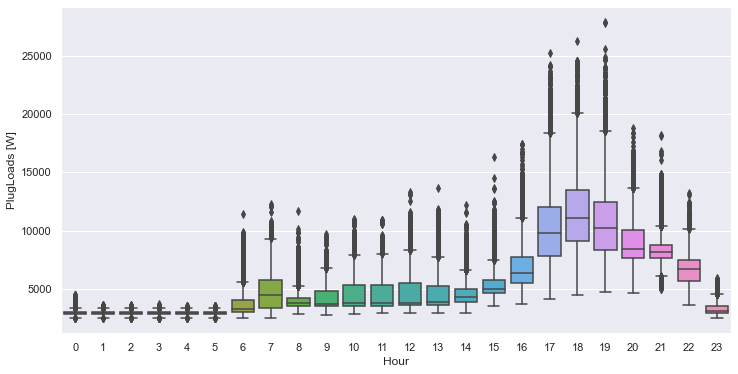

In [55]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_hm, x="Hour",y="PlugLoads [W]") ## Hourly box plot for Plug Loads

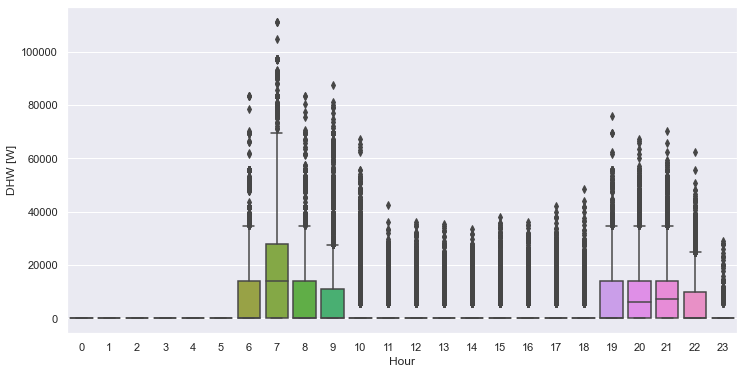

In [56]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_hm, x="Hour",y="DHW [W]") ## Hourly box plot for Hot Water

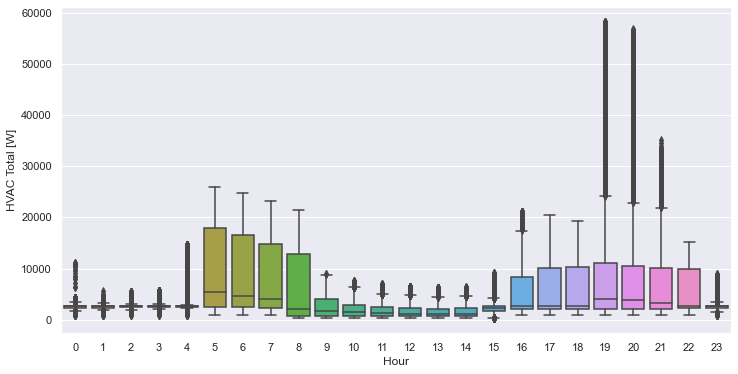

In [57]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_hm, x="Hour",y="HVAC Total [W]") ## Hourly box plot for HVAC

([<matplotlib.axis.XTick at 0x1adacc16250>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

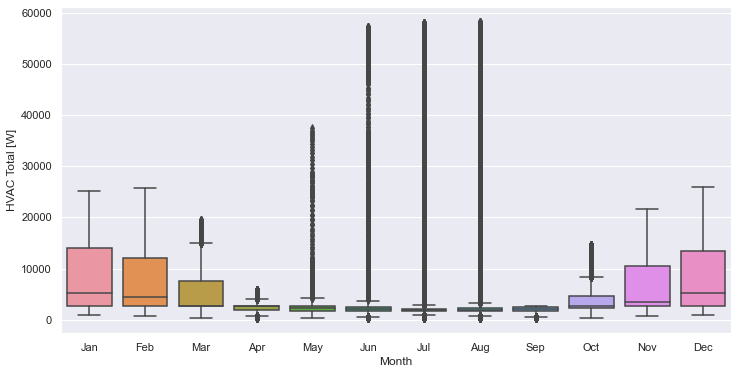

In [58]:
sns.set(rc={'figure.figsize':(12,6)})
sns.boxplot(data=df_hm, x="Month",y="HVAC Total [W]") ## Hourly box plot for HVAC
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = np.arange(len(labels))
plt.xticks(x,labels)

## Conversion to Hourly Data

In [59]:
df_load_365 = df.copy()
df_load_365 = df_load_365.resample("60T").mean()
df_load_365

,PlugLoads [W],DHW [W],HVAC Total [W],Dwelling Total [W]
Time Stamp,,,,
2019-01-01 00:00:00,3429.500000,0.000000,2743.106705,6172.606705
2019-01-01 01:00:00,2977.483333,0.000000,2742.226600,5719.709933
2019-01-01 02:00:00,2981.800000,0.000000,2742.273035,5724.073035
2019-01-01 03:00:00,2951.833333,0.000000,2742.313575,5694.146908
2019-01-01 04:00:00,2926.700000,0.000000,2742.352597,5669.052597
...,...,...,...,...
2019-12-31 19:00:00,14150.800000,13573.666667,11277.229630,39001.696297
2019-12-31 20:00:00,10381.450000,9952.416667,10905.533440,31239.400107
2019-12-31 21:00:00,8631.000000,5223.250000,10653.882875,24508.132875


## Generation profiles

#### Import 80% Files

In [60]:
dfs45kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_45kWp_crystSi_14_30deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs48kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_48kWp_crystSi_14_15deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs24kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_24kWp_crystSi_14_15deg_72deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs22kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_22kWp_crystSi_14_30deg_72deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs34kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_34kWp_crystSi_14_15deg_95deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs54kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_54kWp_crystSi_14_30deg_95deg_2016_2016.csv",skiprows=10,skipfooter=10)


<ipython-input-60-e7b714e47cc8>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dfs45kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_45kWp_crystSi_14_30deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
<ipython-input-60-e7b714e47cc8>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dfs48kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\80%\\Timeseries_51.462_5.605_SA_48kWp_crystSi_14_15deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
<ipython-input-60-e7b714e47cc8>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine doe

In [61]:
df_80percent = dfs45kW["P"] + dfs48kW["P"] + dfs24kW["P"] + dfs22kW["P"] + dfs34kW["P"] + dfs54kW["P"]
df_80percent = df_80percent.to_frame()
df_80percent["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20160101') + pd.to_timedelta(np.arange(8784),unit='h')).values)
df_80percent = df_80percent.set_index("Time Stamp")
remove = df_80percent.loc["2016-02-29"]
df_80percent_365 = df_80percent.drop(remove.index)
df_80percent_365["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20190101') + pd.to_timedelta(np.arange(8760),unit='h')).values)
df_80percent_365 = df_80percent_365.set_index("Time Stamp")
df_80percent_365 = df_80percent_365.rename(columns={"P":"Solar Production [W]"})
df_80percent_365

,Solar Production [W]
Time Stamp,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2019-12-31 19:00:00,0.0
2019-12-31 20:00:00,0.0
2019-12-31 21:00:00,0.0


#### Import 60% Files

In [62]:
dfs34kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_34kWp_crystSi_14_30deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs36kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_36kWp_crystSi_14_15deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs18kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_18kWp_crystSi_14_15deg_72deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs17kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_17kWp_crystSi_14_30deg_72deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs25kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_25kWp_crystSi_14_15deg_95deg_2016_2016.csv",skiprows=10,skipfooter=10)
dfs40kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_40kWp_crystSi_14_30deg_95deg_2016_2016.csv",skiprows=10,skipfooter=10)


<ipython-input-62-5a668cacae8c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dfs34kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_34kWp_crystSi_14_30deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
<ipython-input-62-5a668cacae8c>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dfs36kW = pd.read_csv("C:\\Users\\20200457\\OneDrive - TU Eindhoven\\SBC Curriculum\\Design Case\\Microgrid Modeling\\Solar Production_Updated\\60%\\Timeseries_51.462_5.605_SA_36kWp_crystSi_14_15deg_5deg_2016_2016.csv",skiprows=10,skipfooter=10)
<ipython-input-62-5a668cacae8c>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine doe

In [63]:
df_60percent = dfs34kW["P"] + dfs36kW["P"] + dfs18kW["P"] + dfs17kW["P"] + dfs25kW["P"] + dfs40kW["P"]
df_60percent = df_60percent.to_frame()
df_60percent["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20160101') + pd.to_timedelta(np.arange(8784),unit='h')).values)
df_60percent = df_60percent.set_index("Time Stamp")
remove = df_60percent.loc["2016-02-29"]
df_60percent_365 = df_60percent.drop(remove.index)
df_60percent_365["Time Stamp"] = pd.DatetimeIndex((pd.Timestamp('20190101') + pd.to_timedelta(np.arange(8760),unit='h')).values)
df_60percent_365 = df_60percent_365.set_index("Time Stamp")
df_60percent_365 = df_60percent_365.rename(columns={"P":"Solar Production [W]"})
df_60percent_365

,Solar Production [W]
Time Stamp,
2019-01-01 00:00:00,0.0
2019-01-01 01:00:00,0.0
2019-01-01 02:00:00,0.0
2019-01-01 03:00:00,0.0
2019-01-01 04:00:00,0.0
...,...
2019-12-31 19:00:00,0.0
2019-12-31 20:00:00,0.0
2019-12-31 21:00:00,0.0


### Comparison Production Profiles

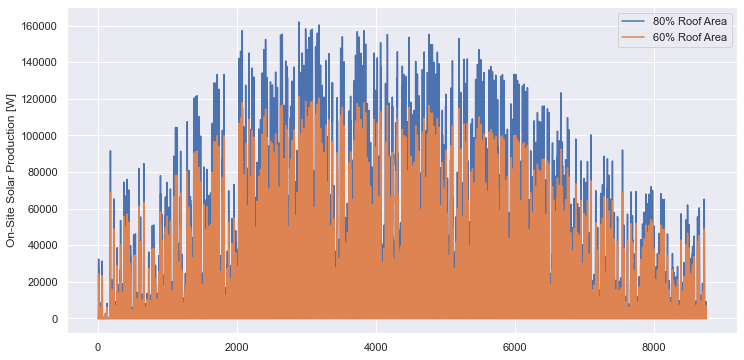

In [64]:
plt.plot(range(0,8760),df_80percent_365["Solar Production [W]"], label = "80% Roof Area")
plt.plot(range(0,8760),df_60percent_365["Solar Production [W]"],label = "60% Roof Area")
plt.ylabel("On-Site Solar Production [W]")
plt.legend(loc="best")

## Combined Load and Production Profiles

In [65]:
dfe_365 = pd.concat([df_load_365,df_60percent_365],axis=1)
dfe_365 = dfe_365.drop(["PlugLoads [W]","DHW [W]","HVAC Total [W]"],axis=1)
dfe_365["Dwelling Total [kW]"] = dfe_365["Dwelling Total [W]"]/1000
dfe_365["Solar Production [kW]"] = dfe_365["Solar Production [W]"]/1000
dfe_365["Dwelling Total [kWh]"] = dfe_365["Dwelling Total [kW]"]
dfe_365["Solar Production [kWh]"] = dfe_365["Solar Production [kW]"]
dfe_365

,Dwelling Total [W],Solar Production [W],Dwelling Total [kW],Solar Production [kW],Dwelling Total [kWh],Solar Production [kWh]
Time Stamp,,,,,,
2019-01-01 00:00:00,6172.606705,0.0,6.172607,0.0,6.172607,0.0
2019-01-01 01:00:00,5719.709933,0.0,5.719710,0.0,5.719710,0.0
2019-01-01 02:00:00,5724.073035,0.0,5.724073,0.0,5.724073,0.0
2019-01-01 03:00:00,5694.146908,0.0,5.694147,0.0,5.694147,0.0
2019-01-01 04:00:00,5669.052597,0.0,5.669053,0.0,5.669053,0.0
...,...,...,...,...,...,...
2019-12-31 19:00:00,39001.696297,0.0,39.001696,0.0,39.001696,0.0
2019-12-31 20:00:00,31239.400107,0.0,31.239400,0.0,31.239400,0.0
2019-12-31 21:00:00,24508.132875,0.0,24.508133,0.0,24.508133,0.0


In [66]:
round(dfe_365.sum(),1)

Dwelling Total [W]        118504035.1
Solar Production [W]      147449184.2
Dwelling Total [kW]          118504.0
Solar Production [kW]        147449.2
Dwelling Total [kWh]         118504.0
Solar Production [kWh]       147449.2
dtype: float64

#### Generation vs Productions Graphs

In [67]:
dfe_365_hm = dfe_365.copy()
dfe_365_hm['Week'] = dfe_365_hm.index.week
dfe_365_hm['Day'] = dfe_365_hm.index.dayofyear
dfe_365_hm['DayOfWeek'] = dfe_365_hm.index.dayofweek
dfe_365_hm['Hour'] = dfe_365_hm.index.hour
dfe_365_hm['Month'] = dfe_365_hm.index.month
dfe_365_hm

,Dwelling Total [W],Solar Production [W],Dwelling Total [kW],Solar Production [kW],Dwelling Total [kWh],Solar Production [kWh],Week,Day,DayOfWeek,Hour,Month
Time Stamp,,,,,,,,,,,
2019-01-01 00:00:00,6172.606705,0.0,6.172607,0.0,6.172607,0.0,1,1,1,0,1
2019-01-01 01:00:00,5719.709933,0.0,5.719710,0.0,5.719710,0.0,1,1,1,1,1
2019-01-01 02:00:00,5724.073035,0.0,5.724073,0.0,5.724073,0.0,1,1,1,2,1
2019-01-01 03:00:00,5694.146908,0.0,5.694147,0.0,5.694147,0.0,1,1,1,3,1
2019-01-01 04:00:00,5669.052597,0.0,5.669053,0.0,5.669053,0.0,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,39001.696297,0.0,39.001696,0.0,39.001696,0.0,1,365,1,19,12
2019-12-31 20:00:00,31239.400107,0.0,31.239400,0.0,31.239400,0.0,1,365,1,20,12
2019-12-31 21:00:00,24508.132875,0.0,24.508133,0.0,24.508133,0.0,1,365,1,21,12


In [68]:
monthlyenergy = pd.pivot_table(dfe_365_hm,values=["Dwelling Total [kWh]","Solar Production [kWh]"],index=dfe_365_hm.Month.values, aggfunc=np.sum)
monthlyenergy = monthlyenergy.round(2)
monthlyenergy

,Dwelling Total [kWh],Solar Production [kWh]
1,13290.29,3191.80
2,11462.43,6157.50
3,10549.45,11425.05
4,8094.22,16995.07
5,8015.30,21348.53
6,7886.55,17843.74
7,8571.64,20306.97
8,8491.99,18616.17
9,7815.70,14942.54
10,9864.87,8676.14


In [69]:
monthlyenergy.sum()

Dwelling Total [kWh]      118504.04
Solar Production [kWh]    147449.17
dtype: float64

##### Seasonal Imbalance

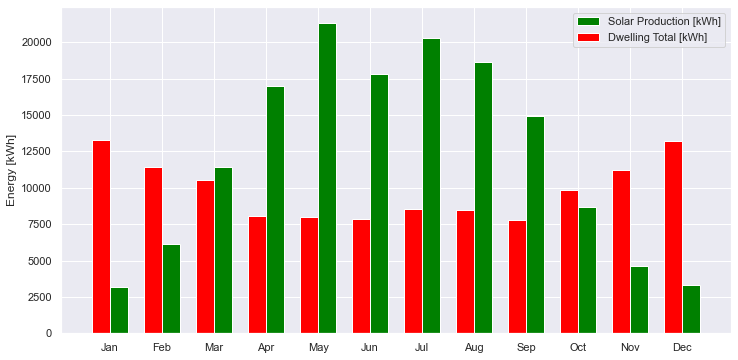

In [70]:
labels = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
x = np.arange(len(labels))
width = 0.35
plt.bar(x + width/2 ,monthlyenergy["Solar Production [kWh]"],width,label="Solar Production [kWh]",color="green")
plt.bar(x - width/2,monthlyenergy["Dwelling Total [kWh]"],width,label="Dwelling Total [kWh]",color="red")
plt.ylabel('Energy [kWh]')
plt.xticks(x,labels)
plt.legend()

##### Day-Night Imbalance

In [71]:
hourlyenergy = pd.pivot_table(dfe_365_hm,values=["Dwelling Total [kWh]","Solar Production [kWh]"],index=dfe_365_hm.Hour.values, aggfunc=np.sum)
hourlyenergy = hourlyenergy.round(2)
hourlyenergy

,Dwelling Total [kWh],Solar Production [kWh]
0,2006.66,0.00
1,2011.11,0.00
2,2019.78,0.00
3,2027.02,0.00
4,2304.68,57.70
5,4673.74,605.38
6,7782.71,2186.30
7,12230.97,4939.45
8,6267.83,9039.31
9,4772.51,12858.50


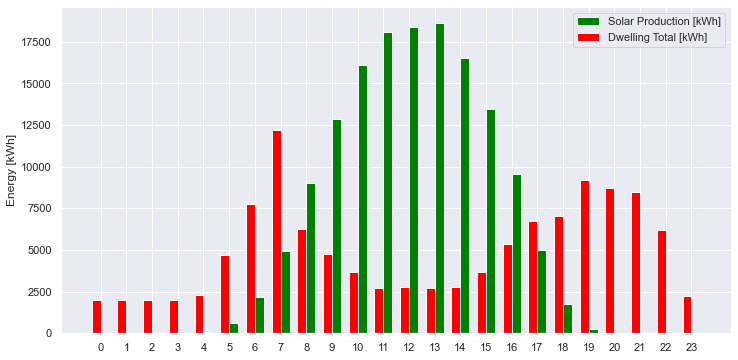

In [72]:
labels = hourlyenergy.index
x = np.arange(len(labels))
width = 0.35
plt.bar(x + width/2 ,hourlyenergy["Solar Production [kWh]"],width,label="Solar Production [kWh]",color="green")
plt.bar(x - width/2,hourlyenergy["Dwelling Total [kWh]"],width,label="Dwelling Total [kWh]",color="red")
plt.ylabel('Energy [kWh]')
plt.xticks(x,labels)
plt.legend()

In [73]:
df_night = dfe_365_hm.between_time("21:00","06:00")
df_night


,Dwelling Total [W],Solar Production [W],Dwelling Total [kW],Solar Production [kW],Dwelling Total [kWh],Solar Production [kWh],Week,Day,DayOfWeek,Hour,Month
Time Stamp,,,,,,,,,,,
2019-01-01 00:00:00,6172.606705,0.0,6.172607,0.0,6.172607,0.0,1,1,1,0,1
2019-01-01 01:00:00,5719.709933,0.0,5.719710,0.0,5.719710,0.0,1,1,1,1,1
2019-01-01 02:00:00,5724.073035,0.0,5.724073,0.0,5.724073,0.0,1,1,1,2,1
2019-01-01 03:00:00,5694.146908,0.0,5.694147,0.0,5.694147,0.0,1,1,1,3,1
2019-01-01 04:00:00,5669.052597,0.0,5.669053,0.0,5.669053,0.0,1,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 05:00:00,24125.693835,0.0,24.125694,0.0,24.125694,0.0,1,365,1,5,12
2019-12-31 06:00:00,22167.024153,0.0,22.167024,0.0,22.167024,0.0,1,365,1,6,12
2019-12-31 21:00:00,24508.132875,0.0,24.508133,0.0,24.508133,0.0,1,365,1,21,12


In [74]:
nightenergy = pd.pivot_table(df_night,values="Dwelling Total [kWh]",index=df_night.Day.values, aggfunc=np.sum)
nightenergy = nightenergy.round(2)
nightenergy

,Dwelling Total [kWh]
1,127.00
2,144.72
3,138.72
4,136.65
5,149.99
...,...
361,136.36
362,132.67
363,143.21
364,129.96


In [75]:
avg_night_load = nightenergy.mean()
avg_night_load

Dwelling Total [kWh]    108.930466
dtype: float64

## Energy Management Algorithm

In [76]:
df_bat = dfe_365.copy()
df_bat

,Dwelling Total [W],Solar Production [W],Dwelling Total [kW],Solar Production [kW],Dwelling Total [kWh],Solar Production [kWh]
Time Stamp,,,,,,
2019-01-01 00:00:00,6172.606705,0.0,6.172607,0.0,6.172607,0.0
2019-01-01 01:00:00,5719.709933,0.0,5.719710,0.0,5.719710,0.0
2019-01-01 02:00:00,5724.073035,0.0,5.724073,0.0,5.724073,0.0
2019-01-01 03:00:00,5694.146908,0.0,5.694147,0.0,5.694147,0.0
2019-01-01 04:00:00,5669.052597,0.0,5.669053,0.0,5.669053,0.0
...,...,...,...,...,...,...
2019-12-31 19:00:00,39001.696297,0.0,39.001696,0.0,39.001696,0.0
2019-12-31 20:00:00,31239.400107,0.0,31.239400,0.0,31.239400,0.0
2019-12-31 21:00:00,24508.132875,0.0,24.508133,0.0,24.508133,0.0


In [77]:
df_bat["Battery Allocation [kWh]"] = 0
df_bat["Battery SOC [kWh]"] = 0
df_bat["Battery Use [kWh]"]= 0
df_bat["Grid Import [kWh]"] = 0
df_bat["Grid Export [kWh]"] = 0
df_bat["Grid Dependence [0/1]"] = np.nan
df_bat["Load minus Solar [kWh]"] = 0
df_bat["Battery Allocated [kWh]"] = 0
df_bat

,Dwelling Total [W],Solar Production [W],Dwelling Total [kW],Solar Production [kW],Dwelling Total [kWh],Solar Production [kWh],Battery Allocation [kWh],Battery SOC [kWh],Battery Use [kWh],Grid Import [kWh],Grid Export [kWh],Grid Dependence [0/1],Load minus Solar [kWh],Battery Allocated [kWh]
Time Stamp,,,,,,,,,,,,,,
2019-01-01 00:00:00,6172.606705,0.0,6.172607,0.0,6.172607,0.0,0,0,0,0,0,NaN,0,0
2019-01-01 01:00:00,5719.709933,0.0,5.719710,0.0,5.719710,0.0,0,0,0,0,0,NaN,0,0
2019-01-01 02:00:00,5724.073035,0.0,5.724073,0.0,5.724073,0.0,0,0,0,0,0,NaN,0,0
2019-01-01 03:00:00,5694.146908,0.0,5.694147,0.0,5.694147,0.0,0,0,0,0,0,NaN,0,0
2019-01-01 04:00:00,5669.052597,0.0,5.669053,0.0,5.669053,0.0,0,0,0,0,0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,39001.696297,0.0,39.001696,0.0,39.001696,0.0,0,0,0,0,0,NaN,0,0
2019-12-31 20:00:00,31239.400107,0.0,31.239400,0.0,31.239400,0.0,0,0,0,0,0,NaN,0,0
2019-12-31 21:00:00,24508.132875,0.0,24.508133,0.0,24.508133,0.0,0,0,0,0,0,NaN,0,0


## Parameterized Battery Size Viz Solar Utilization Capability

In [78]:
useful_batt_cap = np.arange(0,425,25)
useful_batt_cap

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375, 400])

In [79]:
def batterycontroller(df_bat,useful_batt_cap):
    for i in range(1,len(df_bat)):
        if df_bat.iloc[i,5]>df_bat.iloc[i,4] : # Check if prod > consumption = Charging
            df_bat.iloc[i,12] = df_bat.iloc[i,4]-df_bat.iloc[i,5]
            df_bat.iloc[i,6] = df_bat.iloc[i,5]-df_bat.iloc[i,4] # New Allocation to battery
            if (df_bat.iloc[i-1,7] < useful_batt_cap): # Check if Existing SOC < Battery Size
                if (df_bat.iloc[i,6] + df_bat.iloc[i-1,7] <= useful_batt_cap):
                    df_bat.iloc[i,7] =  df_bat.iloc[i-1,7]+df_bat.iloc[i,6] # Full Allocation to Battery
                    df_bat.iloc[i,8] = 0 #Charging Cycle
                    df_bat.iloc[i,9] = 0 #No Import
                    df_bat.iloc[i,10] = 0 # No Export
                    df_bat.iloc[i,11] = 0 # No Grid Dependence
                    df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7] 
                else:
                    df_bat.iloc[i,7] =  df_bat.iloc[i-1,7] + (useful_batt_cap-df_bat.iloc[i-1,7]) # Limited Allocation to Battery
                    df_bat.iloc[i,8] = 0 #Charging Cycle
                    df_bat.iloc[i,9] = 0 #No Import
                    df_bat.iloc[i,10] = df_bat.iloc[i,6]+df_bat.iloc[i-1,7]-useful_batt_cap # Exported Excess   
                    df_bat.iloc[i,11] = 1 # Partial Grid Dependency
                    df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7]
            else: # Export Complete Energy
           
                df_bat.iloc[i,7] = df_bat.iloc[i-1,7] # New Allocation to battery
                df_bat.iloc[i,8] = 0 #Charging Cycle
                df_bat.iloc[i,9] = 0 #No Import
                df_bat.iloc[i,10]= df_bat.iloc[i,6]
                df_bat.iloc[i,11] = 1 # Grid Dependence
                df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7]
                    
        elif df_bat.iloc[i,5]==df_bat.iloc[i,4] : # Check if production = consumption
            df_bat.iloc[i,12] = df_bat.iloc[i,4]-df_bat.iloc[i,5]
            df_bat.iloc[i,12] = df_bat.iloc[i,4] - 0
            df_bat.iloc[i,6] = 0 # Zero Excess to Battery 
            df_bat.iloc[i,7] = df_bat.iloc[i-1,7]  #Maintain Previous State
            df_bat.iloc[i,8] = 0 # No Use
            df_bat.iloc[i,9] = 0 #No Import
            df_bat.iloc[i,10] = 0 #No Export
            df_bat.iloc[i,11] = 0 # No Grid Dependence
            df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7]
        
        else: # Discharging Cycle
            df_bat.iloc[i,12] = df_bat.iloc[i,4]-df_bat.iloc[i,5]  
            if (df_bat.iloc[i-1,7] > 0):  # Check if Battery is charged
                if (df_bat.iloc[i-1,7] > df_bat.iloc[i,12]): # Check if on-site batter + solar can meet complete load
                    df_bat.iloc[i,6] = 0 # Discharging Cycle so no new allocation
                    df_bat.iloc[i,7] = df_bat.iloc[i-1,7]-df_bat.iloc[i,12] # New SOC
                    df_bat.iloc[i,8] = df_bat.iloc[i,12] # Battery Consumption
                    df_bat.iloc[i,9] = 0 # No Grid Use
                    df_bat.iloc[i,10] = 0 # Discharging Cycle = No Export
                    df_bat.iloc[i,11] = 0 # No Grid Dependence
                    df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7]
                else: # Battery SOC + solar production cannot meet entire load
                    df_bat.iloc[i,6] = 0 # Discharging Cycle so no new allocation
                    df_bat.iloc[i,7] = 0 # New SOC - Replace later with SOC Min
                    df_bat.iloc[i,8] = df_bat.iloc[i-1,7] # Consume Battery
                    df_bat.iloc[i,9] = df_bat.iloc[i,4] - df_bat.iloc[i-1,7]  # Import Excess from Grid
                    df_bat.iloc[i,10] = 0 # Discharging Cycle = No Export
                    df_bat.iloc[i,11] = 1 # Partial Grid Dependency
                    df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7]
            else:
                df_bat.iloc[i,6] = 0 # Discharging Cycle so no new allocation
                df_bat.iloc[i,7] = df_bat.iloc[i-1,7] # Same SOC as before - Replace later with SOC Min
                df_bat.iloc[i,8] =  0 # Consume Battery
                df_bat.iloc[i,9] = df_bat.iloc[i,12] # Not enough RE or Battery on site
                df_bat.iloc[i,10] = 0 # Discharging Cycle = No Export
                df_bat.iloc[i,11] = 1 # Grid Dependence
                df_bat.iloc[i,13] = df_bat.iloc[i,7] - df_bat.iloc[i-1,7]
    return(df_bat)


## OEM Computation

### With Minute Interval Dataset and no battery

In [80]:
df_sol = df_60percent_365.resample("1T").bfill()
import datetime
index = pd.date_range(start="2019-12-31 23:01:00",end="2019-12-31 23:59:00",freq="1T")
columns = df_80percent_365.columns.values
df_sol_temp = pd.DataFrame(index=index, columns=columns)
df_sol_temp = df_sol_temp.fillna(0)
df_sol_temp
df_sol = df_sol.append(df_sol_temp)
df_sol

,Solar Production [W]
2019-01-01 00:00:00,0.0
2019-01-01 00:01:00,0.0
2019-01-01 00:02:00,0.0
2019-01-01 00:03:00,0.0
2019-01-01 00:04:00,0.0
...,...
2019-12-31 23:55:00,0.0
2019-12-31 23:56:00,0.0
2019-12-31 23:57:00,0.0
2019-12-31 23:58:00,0.0


In [81]:
df_oem = df.iloc[:,3:4].copy()
df_oem = pd.concat([df_oem,df_sol],axis=1)
df_oem

,Dwelling Total [W],Solar Production [W]
2019-01-01 00:00:00,7237.681805,0.0
2019-01-01 00:01:00,7235.292614,0.0
2019-01-01 00:02:00,7231.845060,0.0
2019-01-01 00:03:00,7229.994699,0.0
2019-01-01 00:04:00,7229.301856,0.0
...,...,...
2019-12-31 23:55:00,5785.092432,0.0
2019-12-31 23:56:00,5709.868082,0.0
2019-12-31 23:57:00,5767.666172,0.0
2019-12-31 23:58:00,5767.484226,0.0


In [82]:
df_oem["Dwelling Total [kW]"] = df_oem["Dwelling Total [W]"]/1000
df_oem["Solar Production [kW]"] = df_oem["Solar Production [W]"]/1000
df_oem["Dwelling Total [kWh]"] = df_oem["Dwelling Total [kW]"]
df_oem["Solar Production [kWh]"] = df_oem["Solar Production [kW]"]
df_oem

,Dwelling Total [W],Solar Production [W],Dwelling Total [kW],Solar Production [kW],Dwelling Total [kWh],Solar Production [kWh]
2019-01-01 00:00:00,7237.681805,0.0,7.237682,0.0,7.237682,0.0
2019-01-01 00:01:00,7235.292614,0.0,7.235293,0.0,7.235293,0.0
2019-01-01 00:02:00,7231.845060,0.0,7.231845,0.0,7.231845,0.0
2019-01-01 00:03:00,7229.994699,0.0,7.229995,0.0,7.229995,0.0
2019-01-01 00:04:00,7229.301856,0.0,7.229302,0.0,7.229302,0.0
...,...,...,...,...,...,...
2019-12-31 23:55:00,5785.092432,0.0,5.785092,0.0,5.785092,0.0
2019-12-31 23:56:00,5709.868082,0.0,5.709868,0.0,5.709868,0.0
2019-12-31 23:57:00,5767.666172,0.0,5.767666,0.0,5.767666,0.0
2019-12-31 23:58:00,5767.484226,0.0,5.767484,0.0,5.767484,0.0


In [83]:
df_oem["Min"] = df_oem.iloc[:,4:6].min(axis=1)
df_oem["OEM"] = df_oem["Min"]/df_oem["Solar Production [kWh]"]  
MeanOEM = df_oem["OEM"].mean(skipna=True)
print("Annual Calculated OEM =",round(MeanOEM*100,2))

Annual Calculated OEM = 49.28


### With hour interval Dataset and battery

In [55]:
oem = []
for b in range(0,len(useful_batt_cap)):
    oem_itr = batterycontroller(df_bat,useful_batt_cap[b])
    oem_itr["Load +/- Storage"] = oem_itr["Dwelling Total [kWh]"]+oem_itr["Battery Allocated [kWh]"]
    oem_itr["Load +/- Storage"] = oem_itr["Load +/- Storage"].round(2)
    oem_itr["Min"] = oem_itr.iloc[:,[5,14]].min(axis=1)
    oem_itr["OEM"] = oem_itr["Min"]/oem_itr["Solar Production [kWh]"]
    oem.append(oem_itr["OEM"].mean(skipna=True))
oem

[0.5112744172122796,
 0.5895596087811007,
 0.6359536104216581,
 0.6745171320031986,
 0.7064695737197669,
 0.7322080037601463,
 0.7500224267605935,
 0.7617237016935098,
 0.7686063791907322,
 0.773271820801125,
 0.7759481694010963,
 0.7778043225693869,
 0.7791687196910534,
 0.7801683143708115,
 0.7808048300695948,
 0.7814603682632569,
 0.7818970818592976]

Text(0, 0.5, 'OEM [%]')

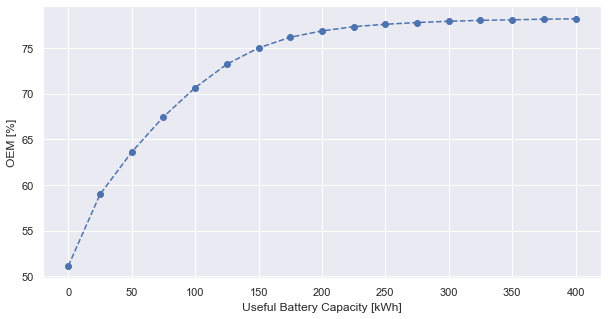

In [56]:
oem = [round(num*100, 2) for num in oem]
sns.set(rc={'figure.figsize':(10,5)})
plt.plot(useful_batt_cap,oem, marker='o', linestyle='--')
plt.xlabel("Useful Battery Capacity [kWh]")
plt.ylabel("OEM [%]")

## PV Contribution to Demand or OEF

In [57]:
pvconttodemand = []
for b in range(0,len(useful_batt_cap)):
    oef = batterycontroller(df_bat,useful_batt_cap[b])
    oef["PV Cont to Demand [%]"] = (oef["Dwelling Total [kWh]"]-oef["Grid Import [kWh]"])/oef["Dwelling Total [kWh]"]
    pvconttodemand.append(oef["PV Cont to Demand [%]"].mean())
pvconttodemand

[0.39370236804097114,
 0.44954166205706936,
 0.49218618730266844,
 0.5432438414389501,
 0.6175334330013706,
 0.6829659860105903,
 0.7240485863673447,
 0.7458054412003581,
 0.7578074052497215,
 0.7648878013801038,
 0.7682781827169577,
 0.7710033612521997,
 0.773288577194635,
 0.7760178559637492,
 0.7774473563169928,
 0.7784341342076162,
 0.7796630273969589]

Text(0, 0.5, 'PV Contribution to Demand or OEF [%]')

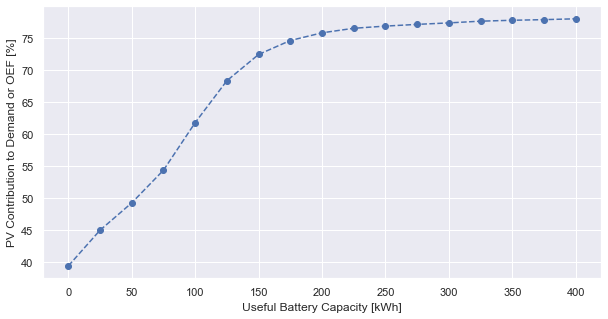

In [58]:
pvconttodemand = [round(num*100, 2) for num in pvconttodemand]
sns.set(rc={'figure.figsize':(10,5)})
plt.plot(useful_batt_cap,pvconttodemand, marker='o', linestyle='--')
plt.xlabel("Useful Battery Capacity [kWh]")
plt.ylabel("PV Contribution to Demand or OEF [%]")

## Grid Dependence

In [59]:
grid_dependence = []
for b in range(0,len(useful_batt_cap)):
    dfs_gd = batterycontroller(df_bat,useful_batt_cap[b])
    grid_dependence.append(dfs_gd["Grid Dependence [0/1]"].sum()/8760)
grid_dependence

[0.9998858447488584,
 0.8773972602739726,
 0.8019406392694064,
 0.7240867579908675,
 0.6261415525114156,
 0.5337899543378996,
 0.4712328767123288,
 0.43881278538812785,
 0.41963470319634705,
 0.4069634703196347,
 0.40079908675799086,
 0.395662100456621,
 0.3917808219178082,
 0.38789954337899546,
 0.3858447488584475,
 0.3843607305936073,
 0.382648401826484]

Text(0, 0.5, 'Grid Dependence')

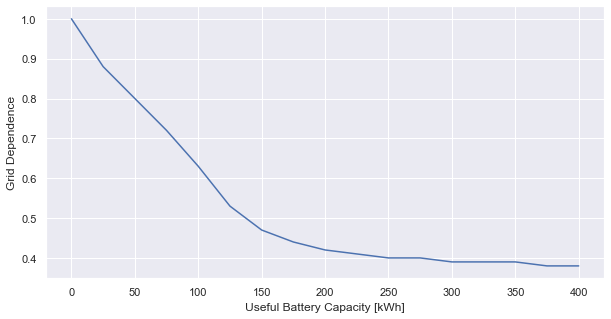

In [60]:
grid_dependence = [round(num, 2) for num in grid_dependence]
sns.set(rc={'figure.figsize':(10,5)})
plt.plot(useful_batt_cap,grid_dependence)
plt.xlabel("Useful Battery Capacity [kWh]")
plt.ylabel("Grid Dependence")

## OPP Computation

Plot Load Duration Curves

In [84]:
OPP = []
for b in range(0,len(useful_batt_cap)):
    df_opp = batterycontroller(df_bat,useful_batt_cap[b])
    df_opp["Grid Exchange [kWh]"] = df_opp.iloc[:,[9,10]].max(axis=1)
    OnePercent = np.percentile(df_opp["Grid Exchange [kWh]"],99)
    df_peak =  df_opp[df_opp["Grid Exchange [kWh]"]>OnePercent]
    OPP.append(df_peak["Grid Exchange [kWh]"].sum()/len(df_peak))
OPP

[106.06700838053187,
 106.06700838053187,
 106.06700838053187,
 106.06700838053187,
 106.06700838053187,
 105.86085624330802,
 105.86085624330802,
 105.86085624330802,
 105.86085624330802,
 105.86085624330802,
 105.86085624330802,
 105.86085624330802,
 105.8105820561099,
 105.8105820561099,
 105.8105820561099,
 105.8105820561099,
 105.8105820561099]

## Final Solution Comparison

In [73]:
df_final = pd.read_excel("FinalSolutions.xlsx")
df_final = df_final.round(2)

In [76]:
import plotly.express as px
fig = px.parallel_coordinates(df_final,color="Roof Area",color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()